# IMPORTANT: DUE TO THE NATURE OF THE PROJECT ROUTES FROM DIFFERENT SOURCES ARE USED FOR THE DATA LOADING

# Data Wrangling, Cleaning and EDA

### First we mount the drive where all the information is located

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Libraries used

In [ ]:
!pip install pingouin
import pingouin
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import pingouin
import pandas.api.types as ptypes
import plotly.express as px
pd.set_option("display.max_roWs", 30)
pd.set_option("display.max_columns", None)


     |████████████████████████████████| 206 kB 7.5 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
     |████████████████████████████████| 9.5 MB 13.4 MB/s 
  Created wheel for pingouin: filename=pingouin-0.4.0-py3-none-any.whl size=206904 sha256=c49520f113bbae52062e22639ae3c9472a88e772e93f730d2cc83b3d6780dc58
  Stored in directory: /root/.cache/pip/wheels/8a/9d/c4/11677c2c4d5c0df9d1d4aa61528d868bb96e13b898e3f51c95
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=1f4068f249c8973c6af089c4429a465be4566ff49f1aaddc124c4989911fb5e9
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

## Process for "Tabla Conductor Logueado"

### Data loading

In [ ]:
lc = pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_1_conductor_logueado/logueo_conductores.csv', sep=';', encoding='latin-1')

### Cleaning

We dropped the unnecesary columns 

In [ ]:
clean_columns = ['textbox2','Textbox1','textbox4','textbox6','textbox7',
                 'textbox8','textbox9','textbox10','textbox11','textbox12']
lc2 = lc.drop(columns = clean_columns)

Renamed the columns

In [ ]:
lc2 = lc2.rename(columns = {'NombreCond':'Nombre_conductor',
                            'Operador':'Concesión',
                            'Tiempo2':'T_log_semana',
                            'ServicioCond':'Servicio_asignado(?)',
                            'Servicio':'Servicio_bus_asignado',
                            'Etiqueta':'ID_vehiculo',
                            'Login':'H_inicio',
                            'Logout':'H_fin',
                            'Tiempo':'T_Log'})

lc2.head()

Then, we extracted the relevant information (Created a column for the code and name of the conductor)

In [ ]:
split_name = lc2.Nombre_conductor.str.split(']', expand=True)
split_name.columns = ['Codigo_conductor','Nombre_conductor_2']
lc3 = pd.concat([split_name,lc2],axis = 1)
lc3 = lc3.drop(columns = 'Nombre_conductor')
lc3 = lc3.replace('\[','',regex=True).astype(str)
lc3

### Type Casting

#### Strings

In [ ]:
lc3['Nombre_conductor_2'] = lc3['Nombre_conductor_2'].astype('string')

#### Dates

In [ ]:
lc3['Fecha'] = pd.to_datetime(lc3['Fecha'])
lc3['T_Log'] = pd.to_datetime(lc3['T_Log'])
lc3.head()

Dropping irrelevant and inaccurate information

In [ ]:
lc3.drop(lc3.loc[lc3['Fecha'] >= '30/04/2021'].index, inplace =True)
lc3

In [ ]:
lc3['T_log (h)'] = lc3['T_Log'].dt.hour + (lc3['T_Log'].dt.minute)/60
lc3.head()

#### Augmentation

In [ ]:
lc3['dia_semana'] = lc3['Fecha'].dt.weekday
lc3.head()

### Analysis

#### **Total hours logged by week day**

In [ ]:
day_week = range(1,8)
plt.bar(day_week, results['T_log (h)'])
plt.xticks(day_week)
plt.ylabel('Total time logged (h)')
plt.xlabel('Weekday')
plt.title('Total hours logged by week day')
plt.savefig("Total hours logged by week day_1.jpg")

In [ ]:
avg_time_log = lc3.groupby('dia_semana').mean()
avg_time_log

#### **Average time logged per week day by each session**

In [ ]:
day_week = range(1,8)
plt.bar(day_week, avg_time_log['T_log (h)'])
plt.xticks(day_week)
plt.ylabel('Average time logged (h)')
plt.xlabel('Weekday')

In [ ]:
time_log_day = lc3.groupby('Fecha').sum()
time_log_day

In [ ]:
mean_time_log_day = lc3.groupby('Fecha').mean()
mean_time_log_day

#### **Average time logged per day by each session**

In [ ]:
day_month = range(1,20)
plt.bar(day_month, mean_time_log_day['T_log (h)'])
plt.xticks(day_month)
plt.ylabel('Average time logged (h)')
plt.xlabel('Day')
plt.title('Average time logged per day by each session')
plt.savefig("Average time logged per day by each session.jpg")

#### **Total time logged per day**

In [ ]:
day_month = range(1,20)
plt.bar(day_month, time_log_day['T_log (h)'])
plt.xticks(day_month)
plt.ylabel('Average time logged (h)')
plt.xlabel('day')
plt.title('Total time logged per day')
plt.savefig("Total time logged per day_2.jpg")

In [ ]:
mean_time_log_day_2 = lc3.groupby('Fecha').count()
mean_time_log_day_2

In [ ]:
mean_time_log_day_3 = lc3.groupby('Fecha').sum()
mean_time_log_day_3

#### **Average time logged by day through the month**

In [ ]:
day_month = range(1,20)
plt.bar(day_month, mean_time_log_day_2['T_log (h)'])
plt.xticks(day_month)
plt.ylabel('Average time logged (h)')
plt.xlabel('day')
plt.savefig("Correlaciones Pearson.jpg")

## Process for "Tabla Actividad"

### Data loading

In [ ]:
number = int(20210000)
activity = pd.DataFrame()
for i in range (1,6):
  for j in range(1,30):
    activity = pd.concat([activity, pd.read_csv('data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Zonal_102 Suba Oriental_202104/'+str(number+i*100+j)+' 102.csv', sep=';', encoding='latin-1')])
    activity = pd.concat([activity, pd.read_csv('data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Zonal_112 Suba Oriental_202104/'+str(number+i*100+j)+' 112.csv', sep=';', encoding='latin-1')])

### Data cleaning

In [ ]:
# Check for data types
activity.dtypes

In [ ]:
# We parse the field "Fecha" as datetime
activity['Fecha'] = pd.to_datetime(activity['Fecha'], dayfirst=True)

In [ ]:
# We check for NaN values in both departure and arrival times

activity[(pd.isnull(activity['HoraLlegada'])) & (pd.isnull(activity['HoraSalida']))].tail()

In [ ]:
# We extract the integer from the field "NumEventosBus"

activity['NumEventosBus'] = activity['NumEventosBus'].astype('string').str.extract('([0-9]+)')
activity['NumEventosBus'] = activity['NumEventosBus'].astype('int')

In [ ]:
# Extract the relevant information from the fields "Linea" and "Operador"

activity['Linea'] = activity['Linea'].str.extract('\[(.+)\]')
activity['Operador'] = activity['Operador'].str.extract('\[.+\] (\S+)')

In [ ]:
# Casting the categorical data types

activity['Evento'] = activity['Evento'].astype('category')
activity['CodigoBus'] = activity['CodigoBus'].astype('category')
activity['NumeroBus'] = activity['NumeroBus'].astype('category')
activity['ServicioBus'] = activity['ServicioBus'].astype('category')
activity['Tipo'] = activity['Tipo'].astype('category')

In [ ]:
# Casting the field "Alarma" as a boolean 

activity['Alarma'] = activity['Alarma'].replace('Alarma',True)
activity['Alarma'] = activity['Alarma'].fillna(False)

In [ ]:
# Function adjustment: Looks for erroneous hour stamps such as 24, 25 and 26 and changes them to 00, 01 and 02. Also, for these records the day
# is set to the previous one as per indications from the client

def adjustment(x):
    match = re.search('(^[0-9]+):',str(x[0]))
    if match:
        if int(match.group(1)) > 23:
            return re.sub('(^[0-9]+)',str(int(str(re.search('(^[0-9]+):',str(x[0])).group(1)))%24),str(x[0])), x[1] - datetime.timedelta(days=1) 
    return x

# Function adjustment2: For the rest of the hour fields we only perform the stamp correction and not the day correction

def adjustment2(x):
    match = re.search('(^[0-9]+):',str(x))
    if match:
        if int(match.group(1)) > 23:
            return re.sub('(^[0-9]+)',str(int(str(re.search('(^[0-9]+):',str(x)).group(1)))%24),str(x)) 
    return x

In [ ]:
# Apply adjustment
activity[['HoraTeorica', 'Fecha']] = activity[['HoraTeorica', 'Fecha']].apply(adjustment, axis=1)

In [ ]:
# Aplly adjustment2

activity['HoraReferencia'] = activity['HoraReferencia'].apply(adjustment2)
activity['HoraLlegada'] = activity['HoraLlegada'].apply(adjustment2)  
activity['HoraSalida'] = activity['HoraSalida'].apply(adjustment2)

In [ ]:
# Create day of week, month and day of month fields

activity['DiaSemana'] = activity['Fecha'].dt.dayofweek
activity['Mes'] = activity['Fecha'].dt.month
activity['Dia'] = activity['Fecha'].dt.day

In [ ]:
# Cast the time stamp fields as datetime format

activity['HoraTeorica'] = pd.to_datetime(activity['HoraTeorica'], format = '%H:%M:%S')
activity['HoraReferencia'] = pd.to_datetime(activity['HoraReferencia'], format = '%H:%M:%S')
activity['HoraLlegada'] = pd.to_datetime(activity['HoraLlegada'], format = '%H:%M:%S')
activity['HoraSalida'] = pd.to_datetime(activity['HoraSalida'], format = '%H:%M:%S')

In [ ]:
# To fill input missing time stamp values with some degree of randomization we compute the mean between arrival and departure times

mean_activity = (activity['HoraSalida']-activity['HoraLlegada']).mean()
mean_activity = mean_activity.round('1s')

In [ ]:
# Input the missing values in the time stamp fields using the methodology explained in the report

activity['HoraLlegada'][(pd.isnull(activity['HoraLlegada'])) & (pd.isnull(activity['HoraSalida']))] = activity['HoraReferencia']
activity['HoraSalida'][pd.isnull(activity['HoraSalida'])] = activity['HoraLlegada'] + mean_activity + datetime.timedelta(seconds=int(random.randint(0,5)))
df['HoraLlegada'][pd.isnull(df['HoraLlegada'])] = activity['HoraSalida'] - mean_activity - datetime.timedelta(seconds=int(random.randint(0,5)))

In [ ]:
# Extract the timestamp from the time fields

activity['HoraTeorica'] = pd.Series([val.time() for val in activity['HoraTeorica']])
activity['HoraReferencia'] = pd.Series([val.time() for val in activity['HoraReferencia']])
activity['HoraLlegada'] = pd.Series([val.time() for val in activity['HoraLlegada']])
activity['HoraSalida'] = pd.Series([val.time() for val in activity['HoraSalida']]

In [ ]:
# save the complete dataframe
activity.to_csv(path_or_buf='C:/Users/juanc/OneDrive/Escritorio/DS4A/Activity/Act03.csv')

In [ ]:
# save a lighter version of the dataframe with some relevant fields for ease of computation
activity.to_csv(path_or_buf='C:/Users/juanc/OneDrive/Escritorio/DS4A/Activity/Act03L.csv', columns=['Fecha', 'Operador', 'NumeroBus', 'Linea', 'Nodo', 'Descripcion', 'HoraLlegada', 'Hora', 'DiaSemana', 'Mes', 'Dia'])

### Univariate analysis

##### Numerical

In [ ]:
# Create a histogram to observe the number of events per operator
fig, ax = plt.subplots(1,2)
sns.histplot(data=activity[activity['Operador'='SO']], x="NumEventosBus", ax=ax[0,0])
ax[0,0].set_title('Alimentadores Suba Oriental')
sns.histplot(data=activity[activity['Operador'='KN']], x="NumEventosBus", ax=ax[0,1])
ax[0,1].set_title('Zonales Suba Oriental')
fig.suptitle('Frecuencia Número de eventos por Bus')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

In [ ]:
# Create a correlation pairplot to observe pearson correlation between fields
sns.pairplot(activity)

##### Categorical

_NumeroBus_

In [ ]:
# Bus Number Analysis based on operator

fig, ax = plt.subplots(1,2)
sns.barplot(activity[activity['Operador'='SO']]['NumeroBus'].value_counts().index,activity[activity['Operador'='SO']]['NumeroBus'].value_counts().values, ax=ax[0,0])
sns.barplot(activity[activity['Operador'='KEN']]['NumeroBus'].value_counts().index,activity[activity['Operador'='KEN']]['NumeroBus'].value_counts().values, ax=ax[1,0])
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[0,0].set_title('Zonales Suba Oriental')
ax[0,1].set_title('Zonales Kennedy')
fig.suptitle('Frecuencia por número de bus')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.88)

**Analysis**

_Evento_

In [ ]:
# Number of events Analysis based on operator

fig, ax = plt.subplots(1,2)
sns.barplot(activity[activity['Operador'='SO']]['Evento'].value_counts().index,activity[activity['Operador'='SO']]['Evento'].value_counts().values, ax=ax[0,0])
sns.barplot(activity[activity['Operador'='KEN']]['Evento'].value_counts().index,activity[activity['Operador'='KEN']]['Evento'].value_counts().values, ax=ax[1,0])
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[0,0].set_title('Zonales Suba Oriental')
ax[0,1].set_title('Zonales Kennedy')
fig.suptitle('Frecuencia Evento')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.88)

**Analysis**

_Tipo_

In [ ]:
# Travel Type based on operator

fig, ax = plt.subplots(1,2)
sns.barplot(activity[activity['Operador'='SO']]['Tipo'].value_counts().index,activity[activity['Operador'='SO']]['Tipo'].value_counts().values, ax=ax[0,0])
sns.barplot(activity[activity['Operador'='KEN']]['Tipo'].value_counts().index,activity[activity['Operador'='KEN']]['Tipo'].value_counts().values, ax=ax[1,0])
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[0,0].set_title('Zonales Suba Oriental')
ax[0,1].set_title('Zonales Kennedy')
fig.suptitle('Tipo de viaje')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.88)

#### Time

##### Distribution per year

In [ ]:
# Line plots for frequency of records based on date

fig, ax = plt.subplots(1,2)
sns.barplot(activity[activity['Operador'='SO']]['Fecha'].value_counts().index,activity[activity['Operador'='SO']]['Fecha'].value_counts().values, ax=ax[0,0])
sns.barplot(activity[activity['Operador'='KEN']]['Fecha'].value_counts().index,activity[activity['Operador'='KEN']]['Fecha'].value_counts().values, ax=ax[1,0])
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[0,0].set_title('Zonales Suba Oriental')
ax[0,1].set_title('Zonales Kennedy')
fig.suptitle('Frequency and travel date')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.88)

##### Distribution per hour

In [ ]:
# Histograms for frequency of records based on date

fig, ax = plt.subplots(1,2)
sns.barplot(activity[activity['Operador'='SO']]['HoraReferencia'].value_counts().index,activity[activity['Operador'='SO']]['HoraReferencia'].value_counts().values, ax=ax[0,0])
sns.barplot(activity[activity['Operador'='KEN']]['HoraReferencia'].value_counts().index,activity[activity['Operador'='KEN']]['HoraReferencia'].value_counts().values, ax=ax[1,0])
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[0,0].set_title('Zonales Suba Oriental')
ax[0,1].set_title('Zonales Kennedy')
fig.suptitle('Frequency and travel Hour')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.88)

##### Distribution per week days

In [ ]:
# Histograms for frequency of records based on day of month

fig, ax = plt.subplots(1,2)
sns.histplot(activity[activity['Operador'='SO']]['Dia'].values, ax=ax[0,0], bins=14)
sns.histplot(activity[activity['Operador'='KEN']]['Dia'].values, ax=ax[0,1], bins=14)
ax[0,0].set_title('Zonales Suba Oriental')
ax[0,1].set_title('Zonales Kennedy')
fig.suptitle('Frequency per day of month')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

## Process for "Tabla Validaciones"

### Data loading

In [ ]:
# Provided data starts at week 3 of 2021
week = 3 

In [ ]:
# CLEANING VALIDATION SUBA ORIENTAL 1
valid_suba_raw_list=[]
for i in range(0,24):
  for chunk in pd.read_csv('/content/gdrive/MyDrive/Data_DS4A/Reporte de Validaciones/Reporte de Validaciones_Zonal_102 Suba Oriental_202104_Semana '+str(week+i)+'.csv',sep=';',encoding='latin-1',chunksize=100000, parse_dates=['Fecha Clearing','Día Trx'], low_memory=False):
    # DC, T, FE
    # suba oriental

    # Columns are renamed for consistency
    chunk_newcols = {"Fecha Clearing":"fecha_clearing",
                    "Día Trx":"dia_trx",
                    "Hora Trx":"hora_trx",
                    "Operador":"operador",
                    "Ruta Modificada":"ruta_modificada",
                    "Linea SAE":"linea_sae",
                    "Parada":"parada",
                    "Tipo Vehiculo":"tipo_vehiculo",
                    "Vehiculo":"vehiculo",
                    "Tipo de Viaje":"tipo_viaje",
                    "Linea":"id_linea"
                  }
    chunk = chunk.rename(columns=chunk_newcols)

    # The field "Linea" is cleaned by stripping the id number(unnecesary)    
    def split_linea(value):
        value1=str(value)
        value1=value1.split(' ')
        value1=value1[-1].strip() 
        return value1   
    chunk['linea']=chunk['id_linea'].apply(split_linea)

    # An ID is created for each register
    shape_df_chunk=chunk.shape
    chunk['val_id']=np.array([i for i in range(1,shape_df_chunk[0]+1)])

    # The name of each CENEFA is extracted
    chunk['parada']=chunk['parada'].astype('str')
    def split_cenefa(value):
      if re.findall(r'\d{3}\w{1}\d{2}', value)==[]:
        return value
      else:
        return re.findall(r'(\d{3}\w{1}\d{2})', value)[-1]       
    chunk['parada']=chunk['parada'].apply(split_cenefa)

    chunk = chunk.dropna()

    def dec_to_hour(num):
      total = float(num.replace(',', '.'))*84600
      dummy, secs = divmod(total,60)
      hrs, mins = divmod(dummy,60)
      stamp = str(int(hrs)) + ':' + str(int(mins)) + ':' + str(int(secs))
      return stamp
    
    chunk['hora_trx']=chunk['hora_trx'].astype('str')
    indexer=chunk['hora_trx'].str.match('^0,')
    chunk.loc[indexer, 'hora_trx'] = chunk[indexer].apply(lambda row: dec_to_hour(row['hora_trx']), axis=1 )

    # The field "Hora Trx" is parsed to datetime and the time stamp is extracted 
    chunk['hora_trx']=pd.to_datetime(chunk['hora_trx'], format="%H:%M:%S")
    chunk['val_minute']=chunk['hora_trx'].dt.minute
    chunk['val_hour']=chunk['hora_trx'].dt.hour

    # The day of month and day of week are obtained and casted as categorycal
    chunk['val_date']=chunk['fecha_clearing'].dt.day
    chunk['val_day_week']=chunk['fecha_clearing'].dt.dayofweek
    chunk['val_day_name']=chunk['fecha_clearing'].dt.day_name()
    cat_day_name = pd.api.types.CategoricalDtype(categories=['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
    chunk['val_day_name'] = chunk['val_day_name'].astype(cat_day_name) 

    # The month of each transaction is obtained
    chunk['val_month']=chunk['fecha_clearing'].dt.month
    chunk['val_year']=chunk['fecha_clearing'].dt.year
    
    valid_suba_raw_list.append(chunk)

valid_suba_raw=pd.concat(valid_suba_raw_list, axis=0)
valid_suba_raw.reset_index()
valid_suba_raw

In [ ]:
# CLEANING VALIDATION SUBA ORIENTAL 2
# Type casting
valid_suba_raw['operador']=valid_suba_raw['operador'].astype("category")
valid_suba_raw['ruta_modificada']=valid_suba_raw['ruta_modificada'].astype("category")
valid_suba_raw['linea_sae']=valid_suba_raw['linea_sae'].astype("category")
valid_suba_raw['tipo_vehiculo']=valid_suba_raw['tipo_vehiculo'].astype("category")
valid_suba_raw['vehiculo']=valid_suba_raw['vehiculo'].astype("category")
valid_suba_raw['tipo_viaje']=valid_suba_raw['tipo_viaje'].astype("category")
valid_suba_raw['id_linea']=valid_suba_raw['id_linea'].astype("category")
valid_suba_raw['val_id']=valid_suba_raw['val_id'].astype("category")
valid_suba_raw['val_minute']=valid_suba_raw['val_minute'].astype("category")
valid_suba_raw['val_hour']=valid_suba_raw['val_hour'].astype("category")
valid_suba_raw['val_date']=valid_suba_raw['val_date'].astype("category")
valid_suba_raw['val_day_week']=valid_suba_raw['val_day_week'].astype("category")
valid_suba_raw['val_day_name']=valid_suba_raw['val_day_name'].astype("category")
valid_suba_raw['val_month']=valid_suba_raw['val_month'].astype("category")
valid_suba_raw['val_year']=valid_suba_raw['val_year'].astype("category")

In [ ]:
# CLEANING VALIDATION KENNEDY 1
valid_ken_raw_list=[]
for i in range(0,24):
  for chunk in pd.read_csv('/content/gdrive/MyDrive/Data_DS4A/Reporte de Validaciones/Reporte de Validaciones_Zonal_102 ken Oriental_202104_Semana '+str(week+i)+'.csv',sep=';',encoding='latin-1',chunksize=100000, parse_dates=['Fecha Clearing','Día Trx'], low_memory=False):
    # DC, T, FE
    # ken oriental

    # Columns are renamed for consistency
    chunk_newcols = {"Fecha Clearing":"fecha_clearing",
                    "Día Trx":"dia_trx",
                    "Hora Trx":"hora_trx",
                    "Operador":"operador",
                    "Ruta Modificada":"ruta_modificada",
                    "Linea SAE":"linea_sae",
                    "Parada":"parada",
                    "Tipo Vehiculo":"tipo_vehiculo",
                    "Vehiculo":"vehiculo",
                    "Tipo de Viaje":"tipo_viaje",
                    "Linea":"id_linea"
                  }
    chunk = chunk.rename(columns=chunk_newcols)

    # The field "Linea" is cleaned by stripping the id number(unnecesary)    
    def split_linea(value):
        value1=str(value)
        value1=value1.split(' ')
        value1=value1[-1].strip() 
        return value1   
    chunk['linea']=chunk['id_linea'].apply(split_linea)

    # An ID is created for each register
    shape_df_chunk=chunk.shape
    chunk['val_id']=np.array([i for i in range(1,shape_df_chunk[0]+1)])

    # The name of each CENEFA is extracted
    chunk['parada']=chunk['parada'].astype('str')
    def split_cenefa(value):
      if re.findall(r'\d{3}\w{1}\d{2}', value)==[]:
        return value
      else:
        return re.findall(r'(\d{3}\w{1}\d{2})', value)[-1]       
    chunk['parada']=chunk['parada'].apply(split_cenefa)

    chunk = chunk.dropna()

    def dec_to_hour(num):
      total = float(num.replace(',', '.'))*84600
      dummy, secs = divmod(total,60)
      hrs, mins = divmod(dummy,60)
      stamp = str(int(hrs)) + ':' + str(int(mins)) + ':' + str(int(secs))
      return stamp
    
    chunk['hora_trx']=chunk['hora_trx'].astype('str')
    indexer=chunk['hora_trx'].str.match('^0,')
    chunk.loc[indexer, 'hora_trx'] = chunk[indexer].apply(lambda row: dec_to_hour(row['hora_trx']), axis=1 )

    # The field "Hora Trx" is parsed to datetime and the time stamp is extracted 
    chunk['hora_trx']=pd.to_datetime(chunk['hora_trx'], format="%H:%M:%S")
    chunk['val_minute']=chunk['hora_trx'].dt.minute
    chunk['val_hour']=chunk['hora_trx'].dt.hour

    # The day of month and day of week are obtained and casted as categorycal
    chunk['val_date']=chunk['fecha_clearing'].dt.day
    chunk['val_day_week']=chunk['fecha_clearing'].dt.dayofweek
    chunk['val_day_name']=chunk['fecha_clearing'].dt.day_name()
    cat_day_name = pd.api.types.CategoricalDtype(categories=['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
    chunk['val_day_name'] = chunk['val_day_name'].astype(cat_day_name) 

    # The month of each transaction is obtained
    chunk['val_month']=chunk['fecha_clearing'].dt.month
    chunk['val_year']=chunk['fecha_clearing'].dt.year
    
    valid_ken_raw_list.append(chunk)

valid_ken_raw=pd.concat(valid_ken_raw_list, axis=0)
valid_ken_raw.reset_index()
valid_ken_raw

In [ ]:
# CLEANING VALIDATION KENNEDY 2
# Type casting
valid_ken_raw['operador']=valid_ken_raw['operador'].astype("category")
valid_ken_raw['ruta_modificada']=valid_ken_raw['ruta_modificada'].astype("category")
valid_ken_raw['linea_sae']=valid_ken_raw['linea_sae'].astype("category")
valid_ken_raw['tipo_vehiculo']=valid_ken_raw['tipo_vehiculo'].astype("category")
valid_ken_raw['vehiculo']=valid_ken_raw['vehiculo'].astype("category")
valid_ken_raw['tipo_viaje']=valid_ken_raw['tipo_viaje'].astype("category")
valid_ken_raw['id_linea']=valid_ken_raw['id_linea'].astype("category")
valid_ken_raw['val_id']=valid_ken_raw['val_id'].astype("category")
valid_ken_raw['val_minute']=valid_ken_raw['val_minute'].astype("category")
valid_ken_raw['val_hour']=valid_ken_raw['val_hour'].astype("category")
valid_ken_raw['val_date']=valid_ken_raw['val_date'].astype("category")
valid_ken_raw['val_day_week']=valid_ken_raw['val_day_week'].astype("category")
valid_ken_raw['val_day_name']=valid_ken_raw['val_day_name'].astype("category")
valid_ken_raw['val_month']=valid_ken_raw['val_month'].astype("category")
valid_ken_raw['val_year']=valid_ken_raw['val_year'].astype("category")

### Cleaning and exploration

In [ ]:
# EDA
# info datasets

valid_suba_raw.info()
print('\n')
valid_ken_raw.info()

In [ ]:
# EDA
# cantidad de duplicated values

dup_valid_suba_raw=valid_suba_raw[valid_suba_raw.duplicated(keep=False)]
dup_valid_ken_raw=valid_ken_raw[valid_ken_raw.duplicated(keep=False)]

print(dup_valid_suba_raw.info())
print(dup_valid_ken_raw.info())

In [ ]:
# EDA
# calcula los valores únicos de las columnas seleccionadas como argumentos
def unique_vals (df, *args):

    for col in args:    
        print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
        print(valid_suba_raw[col].value_counts().to_frame().reset_index().sort_values(by=['index']))
        print('\n')
        print(valid_suba_raw[col].unique().shape)
        print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
        print('\n')

# valores únicos suba oriental
unique_vals (valid_suba_raw, 'Fecha Clearing', 'Día Trx', 'Hora Trx', 'Operador', 'Ruta Modificada', 'Linea SAE', 'Parada', 'Tipo Vehiculo', 'Vehiculo', 'Tipo de Viaje', 'Linea')

# valores únicos kennedy
unique_vals (valid_ken_raw, 'Fecha Clearing', 'Día Trx', 'Hora Trx', 'Operador', 'Ruta Modificada', 'Linea SAE', 'Parada', 'Tipo Vehiculo', 'Vehiculo', 'Tipo de Viaje', 'Linea')

#### Univariate analysis for Kennedy

In [ ]:
# EDA
# kennedy

bar_hour_ken=valid_ken_raw.groupby(['val_hour'])['val_id'].count()
bar_hour_ken=bar_hour_ken.reset_index()

sns.barplot(data=bar_hour_ken, x='val_hour', y='val_id', palette="pastel")

In [ ]:
# EDA
# kennedy

bar_weekday_ken=valid_ken_raw.groupby(['val_day_name'])['val_id'].count()
bar_weekday_ken=bar_weekday_ken.reset_index()

sns.barplot(data=bar_weekday_ken, x='val_day_name', y='val_id', palette="pastel")
plt.xticks(rotation=90)

In [ ]:
# EDA
# kennedy

bar_day_ken=valid_ken_raw.groupby(['val_date'])['val_id'].count()
bar_day_ken=bar_day_ken.reset_index()

sns.barplot(data=bar_day_ken, x='val_date', y='val_id', palette="pastel")

In [ ]:
# EDA
# kennedy

valid_ken_parada=valid_ken_raw.groupby(['parada'])['val_id'].count()
valid_ken_parada=valid_ken_parada.reset_index().sort_values(by='val_id', ascending=False).head(30)

f10, ax10 = plt.subplots(figsize=(15, 6))
g0=sns.barplot(data=valid_ken_parada, x='parada', y='val_id', palette="pastel", ax=ax10)
plt.xticks(rotation=90)

In [ ]:
# EDA
# kennedy

valid_ken_linea=valid_ken_raw.groupby(['linea'])['val_id'].count()
valid_ken_linea=valid_ken_linea.reset_index().sort_values(by='val_id', ascending=False)

f11, ax11 = plt.subplots(figsize=(17, 6))
g1=sns.barplot(data=valid_ken_linea, x='linea', y='val_id', palette="pastel", ax=ax11)
plt.xticks(rotation=90)

In [ ]:
# EDA
# kennedy

valid_ken_hmn_linea=pd.crosstab(index=valid_ken_raw["linea"], columns=valid_ken_raw["val_hour"], normalize="index")*100

f12, ax12 = plt.subplots(figsize=(20, 20))
g2=sns.heatmap(valid_ken_hmn_linea, cmap="Reds", ax=ax12, annot=True, fmt=".2f")

In [ ]:
# EDA
# kennedy

valid_ken_hmn_parada_hour=pd.crosstab(index=valid_ken_raw["linea"], columns=valid_ken_raw["val_hour"], normalize="columns")*100

f13, ax13 = plt.subplots(figsize=(20, 20))
g3=sns.heatmap(valid_ken_hmn_parada_hour, cmap="Reds", ax=ax13, annot=True, fmt=".2f")

In [ ]:
# EDA
# kennedy

valid_ken_hm_hourday=pd.crosstab(index=valid_ken_raw["val_day_name"], columns=valid_ken_raw["val_hour"])

f14, ax14 = plt.subplots(figsize=(20, 8))
g4=sns.heatmap(valid_ken_hm_hourday, cmap="Reds" ,ax=ax14, annot=True, fmt="d")

In [ ]:
# EDA
# kennedy

valid_ken_hmn_dayhour=pd.crosstab(index=valid_ken_raw["val_day_name"], columns=valid_ken_raw["val_hour"], normalize='index')

f15, ax15 = plt.subplots(figsize=(15, 8))
g5=sns.heatmap(valid_ken_hmn_dayhour, cmap="Reds" ,ax=ax15, annot=True, fmt=".2f")

In [ ]:
# EDA
# kennedy

valid_ken_hmn_hourday=pd.crosstab(index=valid_ken_raw["val_day_name"], columns=valid_ken_raw["val_hour"], normalize='columns')

f16, ax16 = plt.subplots(figsize=(15, 8))
g6=sns.heatmap(valid_ken_hmn_hourday, cmap="Reds" ,ax=ax16, annot=True, fmt=".2f")

In [ ]:
# EDA
# kennedy

# Monthly average of validations for different bus stops
unique_values_paradas_ken=valid_ken_parada['parada'].unique()
valid_ken_pltmeanparada=valid_ken_raw[valid_ken_raw['val_month']==4].groupby(['parada', 'val_hour', 'fecha_clearing'])['val_id'].count()
valid_ken_pltmeanparada=valid_ken_pltmeanparada.reset_index()
valid_ken_pltmeanparada=valid_ken_pltmeanparada[valid_ken_pltmeanparada['parada'].isin(unique_values_paradas_ken)]
valid_ken_pltmeanparada=valid_ken_pltmeanparada.groupby(['parada', 'val_hour'])['val_id'].mean().reset_index()

fig7 = px.line(valid_ken_pltmeanparada, x="val_hour", y="val_id", color='parada')
fig7.show()

In [ ]:
# EDA
# kennedy

# Monthly average of validations for different bus lines

valid_ken_pltmeanlinea=valid_ken_raw[valid_ken_raw['val_month']==4].groupby(['linea', 'val_hour', 'fecha_clearing'])['val_id'].count()
valid_ken_pltmeanlinea=valid_ken_pltmeanlinea.reset_index()
valid_ken_pltmeanlinea=valid_ken_pltmeanlinea.groupby(['linea', 'val_hour'])['val_id'].mean().reset_index()

fig7 = px.line(valid_ken_pltmeanlinea, x="val_hour", y="val_id", color='linea')
fig7.show()

In [ ]:
# EDA
# kennedy

# Total validations per day for different bus stops

valid_ken_pltlinead=valid_ken_raw[valid_ken_raw['val_month']==4].groupby(['fecha_clearing', 'linea'])['val_id'].count()
valid_ken_pltlinead=valid_ken_pltlinead.reset_index()

fig8 = px.line(valid_ken_pltlinead, x="fecha_clearing", y="val_id", color='linea')
fig8.show()

In [ ]:
# EDA
# kennedy

# Total validations per day for different bus lines

valid_ken_pltlineah=valid_ken_raw[valid_ken_raw['val_month']==4].groupby(['val_hour', 'linea'])['val_id'].count()
valid_ken_pltlineah=valid_ken_pltlineah.reset_index()

fig9 = px.line(valid_ken_pltlineah, x="val_hour", y="val_id", color='linea')
fig9.show()

#### Univariate analysis for Suba Oriental

In [ ]:
# EDA
# suba oriental

bar_hour_suba=valid_suba_raw.groupby(['val_hour'])['val_id'].count()
bar_hour_suba=bar_hour_suba.reset_index()

sns.barplot(data=bar_hour_suba, x='val_hour', y='val_id', palette="pastel")

In [ ]:
# EDA
# suba oriental

bar_weekday_suba=valid_suba_raw.groupby(['val_day_name'])['val_id'].count()
bar_weekday_suba=bar_weekday_suba.reset_index()

sns.barplot(data=bar_weekday_suba, x='val_day_name', y='val_id', palette="pastel")
plt.xticks(rotation=90)

In [ ]:
# EDA
# suba oriental

bar_day_suba=valid_suba_raw.groupby(['val_date'])['val_id'].count()
bar_day_suba=bar_day_suba.reset_index()

sns.barplot(data=bar_day_suba, x='val_date', y='val_id', palette="pastel")

In [ ]:
# EDA
# suba oriental

valid_suba_parada=valid_suba_raw.groupby(['parada'])['val_id'].count()
valid_suba_parada=valid_suba_parada.reset_index().sort_values(by='val_id', ascending=False).head(30)

f0, ax0 = plt.subplots(figsize=(15, 6))
g0=sns.barplot(data=valid_suba_parada, x='parada', y='val_id', palette="pastel", ax=ax0)
plt.xticks(rotation=90)

In [ ]:
# EDA
# suba oriental

valid_suba_linea=valid_suba_raw.groupby(['linea'])['val_id'].count()
valid_suba_linea=valid_suba_linea.reset_index().sort_values(by='val_id', ascending=False)

f1, ax1 = plt.subplots(figsize=(17, 6))
g1=sns.barplot(data=valid_suba_linea, x='linea', y='val_id', palette="pastel", ax=ax1)
plt.xticks(rotation=90)

In [ ]:
# EDA
# suba oriental

valid_suba_hmn_linea=pd.crosstab(index=valid_suba_raw["linea"], columns=valid_suba_raw["val_hour"], normalize="index")*100

f2, ax2 = plt.subplots(figsize=(20, 20))
g2=sns.heatmap(valid_suba_hmn_linea, cmap="Reds", ax=ax2, annot=True, fmt=".2f")

In [ ]:
# EDA
# suba oriental

valid_suba_hmn_parada_hour=pd.crosstab(index=valid_suba_raw["linea"], columns=valid_suba_raw["val_hour"], normalize="columns")*100

f3, ax3 = plt.subplots(figsize=(20, 20))
g3=sns.heatmap(valid_suba_hmn_parada_hour, cmap="Reds", ax=ax3, annot=True, fmt=".2f")

In [ ]:
# EDA
# suba oriental

valid_suba_hm_hourday=pd.crosstab(index=valid_suba_raw["val_day_name"], columns=valid_suba_raw["val_hour"])

f4, ax4 = plt.subplots(figsize=(20, 8))
g4=sns.heatmap(valid_suba_hm_hourday, cmap="Reds" ,ax=ax4, annot=True, fmt="d")

In [ ]:
# EDA
# suba oriental

valid_suba_hmn_dayhour=pd.crosstab(index=valid_suba_raw["val_day_name"], columns=valid_suba_raw["val_hour"], normalize='index')

f5, ax5 = plt.subplots(figsize=(15, 8))
g5=sns.heatmap(valid_suba_hmn_dayhour, cmap="Reds" ,ax=ax5, annot=True, fmt=".2f")

In [ ]:
# EDA
# suba oriental

valid_suba_hmn_hourday=pd.crosstab(index=valid_suba_raw["val_day_name"], columns=valid_suba_raw["val_hour"], normalize='columns')

f6, ax6 = plt.subplots(figsize=(15, 8))
g6=sns.heatmap(valid_suba_hmn_hourday, cmap="Reds" ,ax=ax6, annot=True, fmt=".2f")

In [ ]:
# EDA
# suba oriental

# Monthly average of validations for different bus stops

unique_values_paradas=valid_suba_parada['parada'].unique()
valid_suba_pltmeanparada=valid_suba_raw[valid_suba_raw['val_month']==4].groupby(['parada', 'val_hour', 'fecha_clearing'])['val_id'].count()
valid_suba_pltmeanparada=valid_suba_pltmeanparada.reset_index()
valid_suba_pltmeanparada=valid_suba_pltmeanparada[valid_suba_pltmeanparada['parada'].isin(unique_values_paradas)]
valid_suba_pltmeanparada=valid_suba_pltmeanparada.groupby(['parada', 'val_hour'])['val_id'].mean().reset_index()

fig7 = px.line(valid_suba_pltmeanparada, x="val_hour", y="val_id", color='parada')
fig7.show()

In [ ]:
# EDA
# suba oriental

# Monthly average of validations for different bus lines

valid_suba_pltmeanlinea=valid_suba_raw[valid_suba_raw['val_month']==4].groupby(['linea', 'val_hour', 'fecha_clearing'])['val_id'].count()
valid_suba_pltmeanlinea=valid_suba_pltmeanlinea.reset_index()
valid_suba_pltmeanlinea=valid_suba_pltmeanlinea.groupby(['linea', 'val_hour'])['val_id'].mean().reset_index()

fig7 = px.line(valid_suba_pltmeanlinea, x="val_hour", y="val_id", color='linea')
fig7.show()

In [ ]:
# EDA
# suba oriental

# Total validations per day for different bus stops

valid_suba_pltlinead=valid_suba_raw[valid_suba_raw['val_month']==4].groupby(['fecha_clearing', 'linea'])['val_id'].count()
valid_suba_pltlinead=valid_suba_pltlinead.reset_index()

fig8 = px.line(valid_suba_pltlinead, x="fecha_clearing", y="val_id", color='linea')
fig8.show()

In [ ]:
# EDA
# suba oriental

# Total validations per day for different bus lines

valid_suba_pltlineah=valid_suba_raw[valid_suba_raw['val_month']==4].groupby(['val_hour', 'linea'])['val_id'].count()
valid_suba_pltlineah=valid_suba_pltlineah.reset_index()

fig9 = px.line(valid_suba_pltlineah, x="val_hour", y="val_id", color='linea')
fig9.show()

## Process for "ProgramacionOperador"

### Data loading

In [ ]:
operator_data = pd.read_csv( '/content/gdrive/MyDrive/data/Masivo_capital_5_programacion/Reporte Progrmacion de Operadores_202104.csv',sep=';', encoding='latin-1')
operator_data

In [ ]:
operator_data.dtypes

In [ ]:
time = pd.DatetimeIndex(operator_data['Amplitud del servicio'])
operator_data['Amplitud del servicio'] = time.hour*60 + time.minute

In [ ]:
time2 = pd.DatetimeIndex(operator_data['Tiempo de producción'])
operator_data['Tiempo de producción'] = time2.hour*60 + time2.minute

In [ ]:
operator_data['Distancia de producción (m)'].isna().sum()

### Cleanning

In [ ]:
operator_data.columns = operator_data.columns.astype(str).str.strip()

#### Dropping columns

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(operator_data.isna(), cmap='Reds',ax=ax)

In [ ]:
operator_data = operator_data.drop(['Unnamed: 17', 'Servicio Base', 'Unnamed: 21','Unnamed: 23'], axis=1)
operator_data

#### Casting

###### Time and Dates

In [ ]:
operator_data['Fecha'] = pd.to_datetime(operator_data['Fecha'], dayfirst=True)
operator_data['Amplitud del servicio'] = pd.to_datetime(operator_data['Amplitud del servicio'])
operator_data['Tiempo de producción'] = pd.to_datetime(operator_data['Tiempo de producción'])
operator_data['Duración'] = pd.to_datetime(operator_data['Duración'])

In [ ]:
operator_data['Hora inicio'] = operator_data['Hora inicio'].replace(to_replace=r'(^24)', value='00', regex=True)
operator_data['Hora inicio'] = operator_data['Hora inicio'].replace(to_replace=r'(^25)', value='01', regex=True)
operator_data['Hora inicio'] = operator_data['Hora inicio'].replace(to_replace=r'(^26)', value='02', regex=True)
operator_data['Hora inicio'] = pd.to_datetime(operator_data['Hora inicio'])

##### Categories

In [ ]:
operator_data['Compañía'] = operator_data['Compañía'].astype('category')
operator_data['Asignación'] = operator_data['Asignación'].astype('category')
operator_data['Código de conductor'] = operator_data['Código de conductor'].astype('category')
operator_data['Conductor'] = operator_data['Conductor'].astype('category')
operator_data['Parte de trabajo'] = operator_data['Parte de trabajo'].astype('category')
operator_data['Tipo de tarea'] = operator_data['Tipo de tarea'].astype('category')
operator_data['Tipo de vehículo'] = operator_data['Tipo de vehículo'].astype('category')
operator_data['Línea'] = operator_data['Línea'].astype('category')
operator_data['Ruta'] = operator_data['Ruta'].astype('category')
operator_data['Vehículo'] = operator_data['Vehículo'].astype('category')
operator_data['Viajes'] = operator_data['Viajes'].astype('category')
operator_data['Trayecto'] = operator_data['Trayecto'].astype('category')
operator_data['Servicio vehículo'] = operator_data['Servicio vehículo'].astype('category')

##### Numerical

In [ ]:
# Remove the "meters" units from the distance related fields
operator_data['Distancia de producción (m)'] = operator_data['Distancia de producción (m)'].astype(str).replace(to_replace=r'(,)', value='.', regex=True)
operator_data['Distancia de producción (m)'] = operator_data['Distancia de producción (m)'].astype(float)

In [ ]:
operator_data['Distancia (m)'] = operator_data['Distancia (m)'].astype(str).replace(to_replace=r'(,)', value='.', regex=True)
operator_data['Distancia (m)'] = operator_data['Distancia (m)'].astype(float)

### Univariate analysis

#### Numerical analysis

In [ ]:
# Histogram for distance of travels
fig,ax = plt.subplots()
sns.histplot(operator_data['Distancia (m)'], ax=ax, bins=20)
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(18.5,10.5)

In [ ]:
# Histograms for effective (on duty) distance of travels
fig,ax = plt.subplots()
sns.histplot(operator_data['Distancia de producción (m)'], ax=ax, bins=20)
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(18.5,10.5)

#### Chronological analysis

In [ ]:
# Histogram for time of travels
fig,ax = plt.subplots()
sns.histplot(operator_data['Amplitud del servicio'], ax=ax, bins=20)
ax.tick_params(axis='x', rotation=90)

fig.set_size_inches(18.5,10.5)

In [ ]:
# Histograms for effective (on duty) time of travels
fig,ax = plt.subplots()
sns.histplot(operator_data['Tiempo de producción'], ax=ax, bins=20)
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(18.5,10.5)

In [ ]:
# Histograms for departure times of travels
fig,ax = plt.subplots()
sns.histplot(operator_data['Hora inicio'], ax=ax, bins=20)
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(18.5,10.5)

## Process for "MatrizDistancia"

In [ ]:
distance_data = pd.read_csv( 'Reporte de Matriz Distancias - Paradas SAE_202104.csv',sep=';', encoding='latin-1')

In [ ]:
DIST_PATH = "data/6. Reporte de Matriz Distancias - Paradas SAE/Reporte de Matriz Distancias - Paradas SAE_202104.csv"

In [ ]:
df = distance_data

df[(df['ID Ruta'] == 400) & (df['Posicion'] == 2)].sort_values(by='Posicion')

,StrLinea,ConfigAct,ConfigFecha,Sublinea,StrRuta,TipoNodo,Nodo,Nombre,Posicion,StrTipoServicio,Linea,ID Ruta


In [ ]:
df.to_csv('matriz_distancia.csv', encoding='utf-8-sig')

### Características del Dataset

In [ ]:
df = distance_data
#df = pd.read_csv(DIST_PATH, delimiter=";", encoding='latin-1')
df.columns

Index(['StrLinea', 'ConfigAct', 'ConfigFecha', 'Sublinea', 'StrRuta',
       'TipoNodo', 'Nodo', 'Nombre', 'Posicion', 'StrTipoServicio', 'Linea',
       'ID Ruta'],
      dtype='object')

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351746 entries, 0 to 351745
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   StrLinea         351746 non-null  object 
 1   ConfigAct        351746 non-null  int64  
 2   ConfigFecha      351746 non-null  int64  
 3   Sublinea         351746 non-null  int64  
 4   StrRuta          351746 non-null  object 
 5   TipoNodo         351746 non-null  int64  
 6   Nodo             351746 non-null  int64  
 7   Nombre           351744 non-null  object 
 8   Posicion         351745 non-null  float64
 9   StrTipoServicio  351745 non-null  object 
 10  Linea            351745 non-null  float64
 11  ID Ruta          351745 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 32.2+ MB


In [ ]:
df.head()

,StrLinea,ConfigAct,ConfigFecha,Sublinea,StrRuta,TipoNodo,Nodo,Nombre,Posicion,StrTipoServicio,Linea,ID Ruta
0,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1970,PORTAL 20 DE JULIO T7,0.0,[5] PADRON,121.0,400.0
1,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1940,Country Sur B - 4 ó 6,1129.0,[5] PADRON,121.0,400.0
2,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1977,Av. 1º de Mayo B - 4 ó 6,1926.0,[5] PADRON,121.0,400.0
3,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1939,Ciudad Jardín-UAN B - 4 ó 6,2554.0,[5] PADRON,121.0,400.0
4,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1960,Policarpa A - 3 ó 6,3151.0,[5] PADRON,121.0,400.0


### Most frequently used Lines and Routes

In [ ]:
def unique_columns(df,columns):

    result = pd.Series(index = df.index)

    groups = meta_data_csv.groupby(by = columns)
    for name,group in groups:
        is_unique = len(group) == 1
        result.loc[group.index] = is_unique

    assert not result.isnull().any()

    return result

rutas_comunes = df.groupby(['Linea','ID Ruta']).size().reset_index().rename(columns={0:'count'})

In [ ]:
rutas_comunes.sort_values(by=["count"], ascending=False)

,Linea,ID Ruta,count
1056,184.0,2680.0,696
3163,773.0,2675.0,605
1258,216.0,2054.0,576
3475,947.0,3984.0,572
3476,947.0,3985.0,572
...,...,...,...
1767,311.0,1489.0,2
1762,310.0,1477.0,2
2579,549.0,1299.0,2
3519,960.0,4041.0,1


### Unique values

In [ ]:
lineas = df.Linea.unique()
print("Number of unique lines: ", len(lineas) )
id_rutas = df["ID Ruta"].unique()
print("Number of unique routes: ", len(id_rutas))

Número de líneas únicas:  1077
Número de rutas únicas:  3819


### Null values analysis

In [ ]:
df.isnull().sum()

StrLinea           0
ConfigAct          0
ConfigFecha        0
Sublinea           0
StrRuta            0
TipoNodo           0
Nodo               0
Nombre             2
Posicion           1
StrTipoServicio    1
Linea              1
ID Ruta            1
dtype: int64

### Histograms

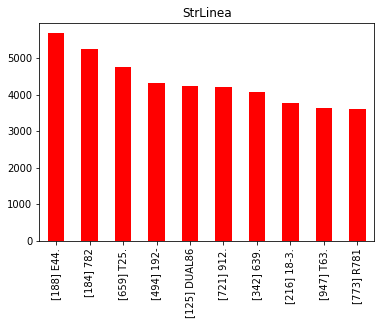

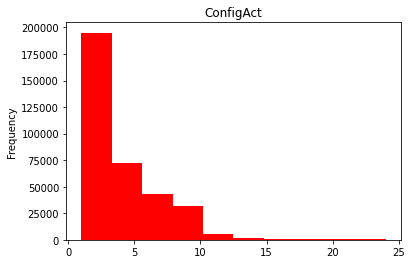

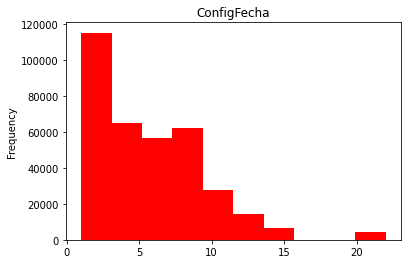

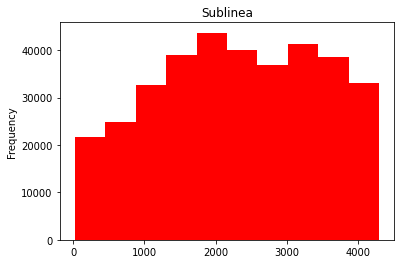

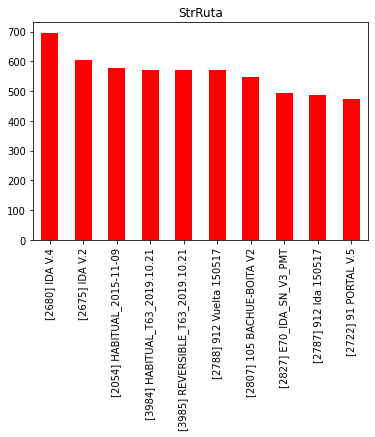

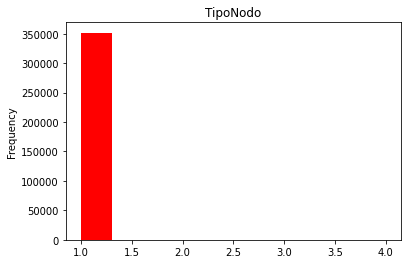

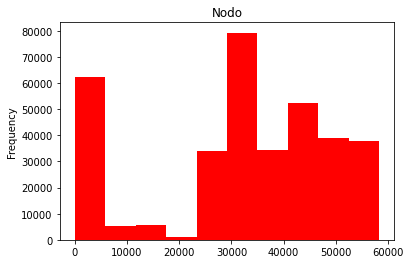

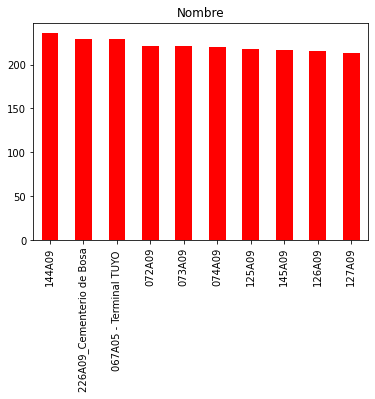

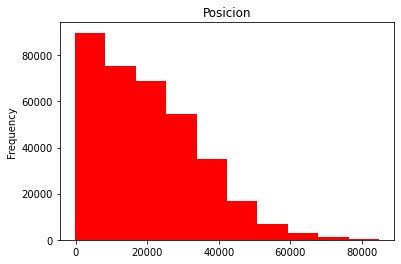

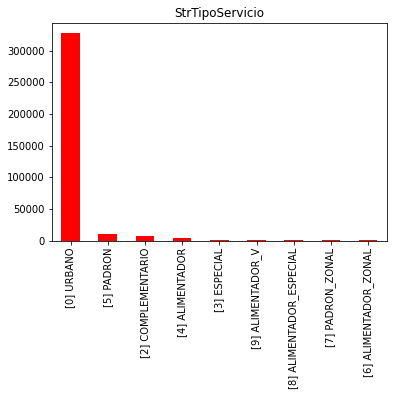

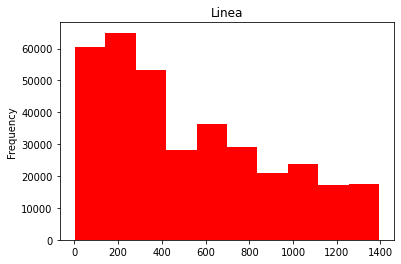

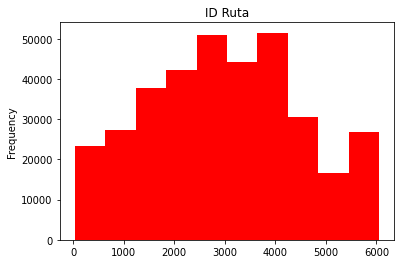

In [ ]:
for column in df:
    plt.figure(column)
    plt.title(column)
    if ptypes.is_numeric_dtype(df[column]):
        df[column].plot(kind="hist", color="red")
    elif ptypes.is_string_dtype(df[column]):
        df[column].value_counts()[:10].plot(kind="bar", color="red")

### Data cleaning

We used two regex for extracting and filtering bus stops identifiers ("Cenefa Paradaero") a Regex that searched for 6 continous alphanumeric characters and a regex that discarded all non-valid characters 

In [ ]:
df_matriz = pd.read_csv("Reporte de Matriz Distancias - Paradas SAE_202104.csv", delimiter=";", encoding="latin1") 
df_paraderos = pd.read_csv("paraderos_clean.csv", delimiter=",", encoding="latin1")
df_locations = pd.read_csv("paraderos-sitp.csv", delimiter=";", encoding="latin1")


### Search function in dataframes

search_df ->  Searches for items in a series in a column in given dataframe <br/>
simple_search_df ->  Searches for single string items in a column in a dataframe <br/>
int_search_df -> Searches for integer item in a column in a given dataframe <br/>
select_subset -> Select subset of dataframe (for algorithm speed testing befor implementing a complex search) <br/>
count_colums ->  counts for ocurrences of unique row items in a dataframe, returns count and percentage <br/>
assign_points ->  used to assign geographic points to dataframe with coincidences in Paradero <br/>
count_cenefa ->  group total count by cenefa <br/>

In [ ]:
def search_df(df, search_term, column="Nombre"):
    """Search for word in search_term in column given return all ocurrences"""
    search_term.to_list()
    return df[df[column].str.contains("|".join(search_term), na=False)]

def simple_search_df(df, search_term, column="Nombre"):
    """Search for word in search_term in column given return all ocurrences"""
    return df[df[column].str.contains(search_term, na=False)]

def int_search_df(df, num, column="Ruta SAE"):
    """Search for word in search_term in column given return all ocurrences"""
    return df[df[column]==num]

def select_subset(df, percent):
    """select a subset of a dataframe of percent given"""
    return df.sample(frac=percent)

def count_columns(df, column):
    """count ocurrences of elements given in column and return dataframe with ocurrences and number of ocurrences"""
    df_count = pd.DataFrame(df[column].value_counts())
    df_count.columns = ['count']
    df_count['percent'] = df_count['count'] / df_count['count'].sum() * 100
    return df_count

def assing_points(df1, df2):
    """Assign values of columns 'PosX', 'PosY' and geopoint by matching 'Cenefa Paradero' in both given dataframes.
    """
    df1['PosX'] = df1['Cenefa Paradero'].apply(lambda x: df2.loc[df2['Cenefa Paradero'] == x, 'PosX'].iloc[0])
    df1['PosY'] = df1['Cenefa Paradero'].apply(lambda x: df2.loc[df2['Cenefa Paradero'] == x, 'PosY'].iloc[0])
    df1['geopoint'] = df1['Cenefa Paradero'].apply(lambda x: df2.loc[df2['Cenefa Paradero'] == x, 'geopoint'].iloc[0])
    return df1

def count_cenefa(df):
    """Count ocurrences of values in 'Cenefa Paradero column' and return as a new column 'count' keep 'PosX' and 'PosY' columns taking first ocurrences in those columns"""
    df['count'] = df['Cenefa Paradero'].value_counts()
    return df


### Search for coincidences of "Cenefa Parqueadero" in locations with "Parada" in df_paraderos

In [ ]:
df_paraderos.head(5)

,",Parada"
0,"0,212A12"
1,"1,212A12"
2,"2,212A12"
3,"3,212A12"
4,"4,212A12"


In [ ]:
# count unique paradas

count_paradas = count_columns(df_paraderos, "Parada")
count_paradas.reset_index(level=0, inplace=True)
count_paradas.rename(columns={"index":"Paradas"}, inplace=True)
count_paradas.head(5)

,Paradas,count,percent
0,603A08,47571,0.959889
1,663A08,46554,0.939368
2,210A08,43496,0.877664
3,367A02,43016,0.867978
4,160A08,41593,0.839265


In [ ]:
result = search_df(df_locations, count_paradas["Paradas"], 'Cenefa Paradero')
result.head(5)

,Ruta Comercial,Linea,Ruta SAE,Posicion,Nodo,PosX,PosY,Cenefa Paradero,geopoint
5,P7,605,1549,4438,37057,590023.7248,510377.5628,546A09,"4.61698132876,-74.1883903229"
6,P7,605,1549,5063,3378,590228.9064,509818.6192,043A09,"4.61192311349,-74.1865463879"
7,14-4,602,1542,4323,40822,603006.5531,506700.9441,301A13,"4.5835807822,-74.071396336"
8,P7,605,1548,6094,39856,600441.1109,504680.6147,025A13,"4.56533537732,-74.0945447675"
9,P7,605,1548,9455,19110,599012.5878,507122.9098,108A11,"4.58744361558,-74.107394169"


In [ ]:
res = count_columns(result, 'Cenefa Paradero')
res.reset_index(level=0, inplace=True)
res.rename(columns={"index":"Cenefa Paradero"}, inplace=True)
res

,Cenefa Paradero,count,percent
0,122A01,48,0.169163
1,242A01,47,0.165639
2,569A09,40,0.140969
3,245A01,38,0.133921
4,051A09,38,0.133921
...,...,...,...
2853,195A02,1,0.003524
2854,030A09,1,0.003524
2855,304A02,1,0.003524
2856,334A12,1,0.003524


### Assign geographical points


In [ ]:
df_res = assing_points(res, result)

In [ ]:
# extract geopoint as lat, lon and convert type to float 

df_res[['lat', 'lon']] = df_res['geopoint'].str.split(',', 1, expand=True)

def convert_cols(df, cols):
    """Convert list of given columns in dataframe to float type"""
    for col in cols:
        df[col] = df[col].astype(float)
    return df

def convert_cols_int(df, cols):
    """Convert list of given columns in dataframe to float type"""
    for col in cols:
        df[col] = df[col].astype(int)
    return df


df_res = convert_cols(df_res, ["lat", "lon"])
df_res = convert_cols_int(df_res,[ "PosX","PosY"])

In [ ]:
df_res.head(5)

,Cenefa Paradero,count,percent,PosX,PosY,geopoint,lat,lon
0,122A01,48,0.169163,604826,518093,"4.68661295173,-74.0548531696",4.686613,-74.054853
1,242A01,47,0.165639,605035,518057,"4.68628228436,-74.0529690031",4.686282,-74.052969
2,569A09,40,0.140969,591473,510022,"4.6137504568,-74.1753260687",4.613750,-74.175326
3,245A01,38,0.133921,607644,520916,"4.71210862705,-74.0294100702",4.712109,-74.029410
4,051A09,38,0.133921,590525,509369,"4.60785994981,-74.1838748347",4.607860,-74.183875


In [ ]:

new_df = df_res.loc[df_res.index.repeat(df_res['count'])].assign(fifo_qty=1).reset_index(drop=True)
new_df.head(5)

,Cenefa Paradero,count,percent,PosX,PosY,geopoint,lat,lon,fifo_qty
0,122A01,48,0.169163,604826,518093,"4.68661295173,-74.0548531696",4.686613,-74.054853,1
1,122A01,48,0.169163,604826,518093,"4.68661295173,-74.0548531696",4.686613,-74.054853,1
2,122A01,48,0.169163,604826,518093,"4.68661295173,-74.0548531696",4.686613,-74.054853,1
3,122A01,48,0.169163,604826,518093,"4.68661295173,-74.0548531696",4.686613,-74.054853,1
4,122A01,48,0.169163,604826,518093,"4.68661295173,-74.0548531696",4.686613,-74.054853,1


In [ ]:
import folium
from folium import plugins
m = folium.Map([4.68661295173,-74.0548531696], zoom_start=12)


In [ ]:
for index, row in new_df.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=0.05,
                        popup=row['Cenefa Paradero'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

### Plot heat map

In [ ]:
paraderosArr = new_df[['lat', 'lon']].values

# plot heatmap
m.add_child(plugins.HeatMap(paraderosArr, radius=15))
m

# Merging Activity and Validation tables with geospatial information

In [ ]:
# Load dataset of nodes
par_val = pd.read_csv(filepath_or_buffer=r'C:/Users/juanc/OneDrive/Escritorio/DS4A/Activity/par_val2.csv')

In [ ]:
# Load dataset of nodes and lines with their assigned cluster and latitude and longitude values
clt = pd.read_csv(filepath_or_buffer=r'C:/Users/juanc/OneDrive/Escritorio/DS4A/Activity/clusters5.csv')

In [ ]:
# Cast all CENEFAS (node public names) as Uppercase and drop NaN values and duplicates
par_val['CENEFA'] = par_val['CENEFA'].str.upper()
pv2 = par_val[par_val['CENEFA'].notna()]
pv2 = pv2.drop(columns=['Unnamed: 0', 'Linea'])
pv2 = pv2.drop_duplicates()

In [ ]:
# Merge the valid cenefas with the nodes on the activity tables
act_cen = activity.merge(pv2, how='left',on=['Nodo'])
act_cen = act_cen[act_cen['CENEFA'].notna()]

In [ ]:
# Drop columns created on merge
activity = activity.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
act_cen = act_cen.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [ ]:
# Cast all CENEFAS (node public names) as Uppercase and filter only relevant fields
clt['CENEFA'] = clt['CENEFA'].str.upper()
clt = clt[['CENEFA', 'Longitud', 'Latitud', 'cluster']]

In [ ]:
# Merge the valid cenefas on the activity table to add their latitude and longitue
act = act_cen.merge(clt, how='left', on=['CENEFA'])